### 순환신경망 주식 예측
- 삼성 주식 데이터


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [26]:
samsung = pd.read_csv("./dataset/005930.KS.csv")

df = samsung.copy()
print(df.shape)
df.head()

(6019, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6019 non-null   object 
 1   Open       6019 non-null   float64
 2   High       6019 non-null   float64
 3   Low        6019 non-null   float64
 4   Close      6019 non-null   float64
 5   Adj Close  6019 non-null   float64
 6   Volume     6019 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.3+ KB


In [28]:
df['Date'] = pd.to_datetime(df['Date'])     # object -> datetime 형식으로 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6019 non-null   datetime64[ns]
 1   Open       6019 non-null   float64       
 2   High       6019 non-null   float64       
 3   Low        6019 non-null   float64       
 4   Close      6019 non-null   float64       
 5   Adj Close  6019 non-null   float64       
 6   Volume     6019 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 329.3 KB


In [29]:
df = df.set_index('Date')       # Date를 index로 사용
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000


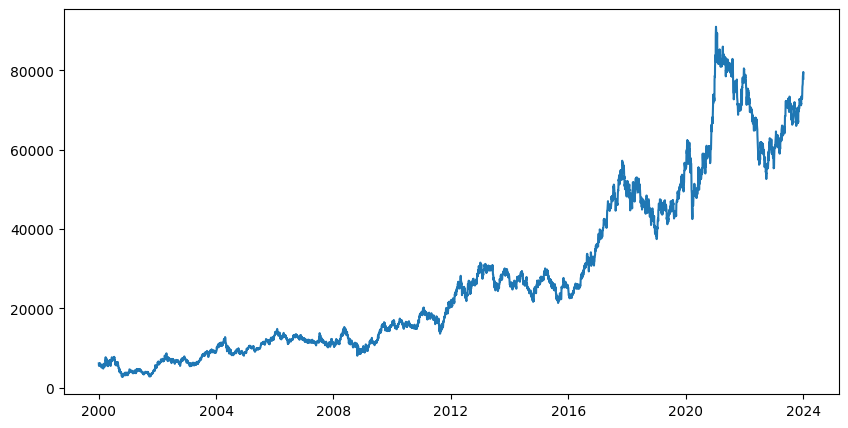

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.show()

### Feature Extraction

In [31]:
df['MA3'] = np.around(df['Close'].rolling(window=3).mean(), 0)       # 3일 이동평균, 반올림. 이전 3일이므로 앞의 두 값은 없음
df['MA5'] = np.around(df['Close'].rolling(window=5).mean(), 0)
df['Mid'] = np.around((df['Open'] + df['Close']) / 2, 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000,NaN,NaN,6055.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000,NaN,NaN,5690.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000,5770.0,NaN,5685.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000,5580.0,NaN,5550.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000,5643.0,5724.0,5685.0


In [32]:
df.isna().sum(axis=0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          2
MA5          4
Mid          0
dtype: int64

In [33]:
df.describe().T             # Volume min이 0인 날이 있음

,count,mean,std,min,25%,50%,75%,max
Open,6019.0,2.750416e+04,2.183309e+04,2540.000000,1.056000e+04,1.910000e+04,4.430000e+04,9.030000e+04
High,6019.0,2.777173e+04,2.200310e+04,2760.000000,1.073000e+04,1.932000e+04,4.482500e+04,9.680000e+04
Low,6019.0,2.722825e+04,2.165059e+04,2420.000000,1.042000e+04,1.886000e+04,4.380000e+04,8.950000e+04
Close,6019.0,2.749727e+04,2.181701e+04,2730.000000,1.056000e+04,1.916000e+04,4.432500e+04,9.100000e+04
Adj Close,6019.0,2.391481e+04,2.140201e+04,2017.153564,7.940696e+03,1.498650e+04,3.864341e+04,8.628670e+04
Volume,6019.0,2.119537e+07,1.515231e+07,0.000000,1.164138e+07,1.710540e+07,2.631302e+07,1.642150e+08
MA3,6017.0,2.749238e+04,2.180581e+04,2790.000000,1.058700e+04,1.906000e+04,4.436700e+04,9.043300e+04
MA5,6015.0,2.748751e+04,2.179516e+04,2810.000000,1.061200e+04,1.906400e+04,4.442000e+04,8.996000e+04
Mid,6019.0,2.750072e+04,2.182386e+04,2635.000000,1.057000e+04,1.912000e+04,4.431250e+04,9.050000e+04


In [34]:
df['Volume'] = df['Volume'].replace(0, np.nan)
df.isna().sum(axis=0)

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
MA3            2
MA5            4
Mid            0
dtype: int64

In [35]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA3', 'MA5',
       'Mid'],
      dtype='object')

In [36]:
X = df.drop(columns=['Close', 'Adj Close'])
y = df['Close']
X.head()

,Open,High,Low,Volume,MA3,MA5,Mid
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,74195000.0,NaN,NaN,6055.0
2000-01-05,5800.0,6060.0,5520.0,74680000.0,NaN,NaN,5690.0
2000-01-06,5750.0,5780.0,5580.0,54390000.0,5770.0,NaN,5685.0
2000-01-07,5560.0,5670.0,5360.0,40305000.0,5580.0,NaN,5550.0
2000-01-10,5600.0,5770.0,5580.0,46880000.0,5643.0,5724.0,5685.0


In [37]:
y.head()

Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

In [38]:
X.shape, y.shape

((6019, 7), (6019,))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.head()

,Open,High,Low,Volume,MA3,MA5,Mid
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,74195000.0,NaN,NaN,6055.0
2000-01-05,5800.0,6060.0,5520.0,74680000.0,NaN,NaN,5690.0
2000-01-06,5750.0,5780.0,5580.0,54390000.0,5770.0,NaN,5685.0
2000-01-07,5560.0,5670.0,5360.0,40305000.0,5580.0,NaN,5550.0
2000-01-10,5600.0,5770.0,5580.0,46880000.0,5643.0,5724.0,5685.0


In [40]:
X_test.head()

,Open,High,Low,Volume,MA3,MA5,Mid
Date,,,,,,,
2019-02-15,46750.0,46850.0,45650.0,10554643.0,46583.0,46160.0,46400.0
2019-02-18,46500.0,46850.0,45850.0,8183728.0,46583.0,46400.0,46350.0
2019-02-19,45850.0,46150.0,45450.0,6741395.0,46067.0,46380.0,45900.0
2019-02-20,46750.0,47100.0,46500.0,11506720.0,46350.0,46520.0,46825.0
2019-02-21,46500.0,47200.0,46200.0,8694009.0,46600.0,46410.0,46725.0


In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4815, 7) (1204, 7) (4815,) (1204,)


In [42]:
def make_sequence_dataset(X, y, window_size):           # *RNN에 맞게 input을 변경*
    feature_list = []
    label_list = []

    for i in range(len(X)-window_size):
        feature_list.append(X[i:i+window_size])
        label_list.append(y[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [43]:
# 결측치

X_train = X_train.dropna()
y_train = y_train[X_train.index]
print(X_train.shape, y_train.shape)

(4697, 7) (4697,)


In [44]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s[:5]

array([[0.05567686, 0.05496713, 0.05815237, 0.28535907, 0.0527386 ,
        0.05379382, 0.05573321],
       [0.05967977, 0.06099343, 0.06164888, 0.36371468, 0.05366286,
        0.05252983, 0.05774326],
       [0.05585881, 0.05441928, 0.05852043, 0.17779902, 0.05477198,
        0.0530503 , 0.05536775],
       [0.05567686, 0.05441928, 0.05778432, 0.25070354, 0.05440228,
        0.05338488, 0.05518502],
       [0.05786026, 0.05697589, 0.05999264, 0.30055513, 0.05477198,
        0.05446299, 0.0573778 ]])

In [45]:
X_train, y_train = make_sequence_dataset(X_train_s, y_train, 20)
print(X_train.shape, y_train.shape)
# (4677, 20, 7) (4677,)  (데이터의갯수, window size(time step), features)

(4677, 20, 7) (4677,)


C:\Users\root\AppData\Local\Temp\ipykernel_2872\1623205690.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_list.append(y[i+window_size])


### Model

In [46]:
from keras import layers

model = keras.Sequential([
    layers.LSTM(units = 128, activation = 'tanh', input_shape = (20, 7)),
    layers.Dense(1)         # "가격"을 예측하는것이기 때문에 출력값은 activation이 필요없음
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               69632     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [47]:
from keras import optimizers

model.compile(
    optimizer='rmsprop',
    loss="mse",
    metrics=['mse']
)

In [48]:
EPOCHS = 50
BATCH_SIZE = 64

history = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50


59/59 [==============================] - 2s 20ms/step - loss: 256832208.0000 - mse: 256832208.0000 - val_loss: 1525005952.0000 - val_mse: 1525005952.0000
Epoch 2/50
59/59 [==============================] - 1s 13ms/step - loss: 256556896.0000 - mse: 256556896.0000 - val_loss: 1524434048.0000 - val_mse: 1524434048.0000
Epoch 3/50
59/59 [==============================] - 1s 13ms/step - loss: 256342064.0000 - mse: 256342064.0000 - val_loss: 1523859200.0000 - val_mse: 1523859200.0000
Epoch 4/50
59/59 [==============================] - 1s 10ms/step - loss: 256127296.0000 - mse: 256127296.0000 - val_loss: 1523287040.0000 - val_mse: 1523287040.0000
Epoch 5/50
59/59 [==============================] - 1s 9ms/step - loss: 255915168.0000 - mse: 255915168.0000 - val_loss: 1522719744.0000 - val_mse: 1522719744.0000
Epoch 6/50
59/59 [==============================] - 1s 9ms/step - loss: 255703536.0000 - mse: 255703536.0000 - val_loss: 1522155264.0000 - val_mse: 1522155264.0000
Epoch 7/50
59/59 [=====

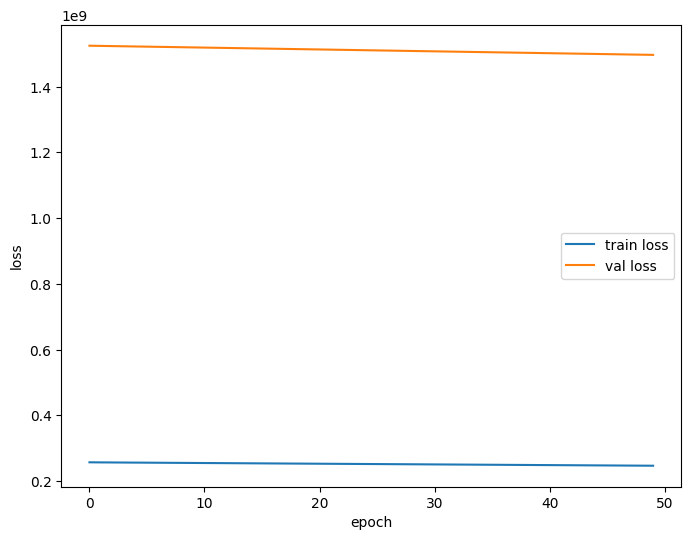

In [49]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (8,6))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.show()

plot_history(history)

### Pred

In [51]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

print(X_test.shape, y_test.shape)

(1191, 7) (1191,)


In [52]:
X_test_s = scaler.transform(X_test)

In [53]:
X_test, y_test = make_sequence_dataset(X_test_s, y_test, 20)
print(X_test.shape, y_test.shape)

(1171, 20, 7) (1171,)


C:\Users\root\AppData\Local\Temp\ipykernel_2872\1623205690.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_list.append(y[i+window_size])


In [54]:
y_pred = model.predict(X_test)
y_pred.shape

37/37 [==============================] - 0s 3ms/step


(1171, 1)

In [55]:
y_pred

array([[393.77863],
       [393.77863],
       [393.77863],
       ...,
       [393.77655],
       [393.7765 ],
       [393.7763 ]], dtype=float32)

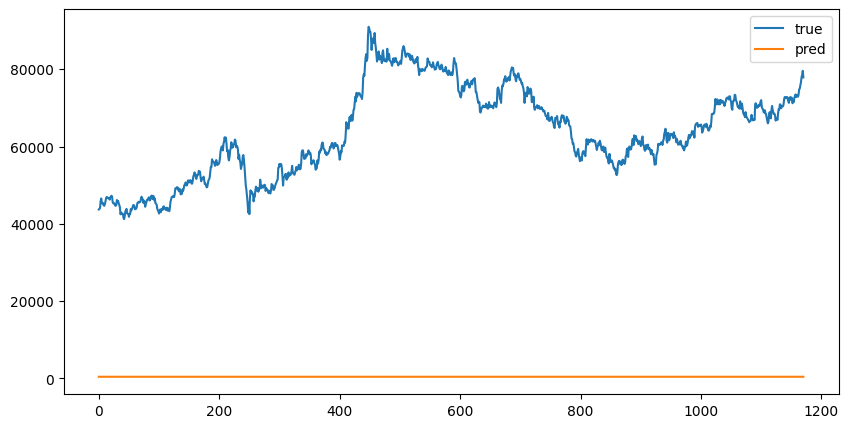

In [56]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()